# Scatter Plot analysis toward the number of tweets and statistics of covid-19 3 states in US

This notebook plot the weekly number of tweets in three different states against the weekly number of confirmed cases and death cases in that states and intend to see the regression trend.

In [2]:
#import the important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json as js
import ast
import re
from datetime import datetime
from datetime import timedelta
import branca.colormap as cm
from branca.colormap import linear

In [3]:
#remove the date that is out of the bounb 
def check_date_inbound(df):
    start_date = datetime.strptime('2020-03-19', '%Y-%m-%d')
    delta = int((datetime.strptime(df['date'], '%Y-%m-%d')-start_date).days)
    if delta < 0:
        return False
    else:
        return True

#get the week index
def get_week_index(df):
    start_date = datetime.strptime('2020-03-19', '%Y-%m-%d')
    delta = int((datetime.strptime(df['date'], '%Y-%m-%d')-start_date).days)    
    return int(delta/7)


#Analysize to the data of invidual states in US scatter plot
#read the file of covid data in us
covid_states_df = pd.read_csv("all-states-history.csv",usecols = ['date','deathIncrease','state','positiveIncrease',])
covid_states_df['deathIncrease'].fillna(0)
covid_states_df['positiveIncrease'].fillna(0)
covid_states_df['date_inbound'] = covid_states_df.apply(check_date_inbound,axis = 1)
covid_states_df = covid_states_df[covid_states_df['date_inbound'] == True]
del covid_states_df['date_inbound']
covid_states_df['week_index'] = covid_states_df.apply(get_week_index,axis = 1)
covid_states_df 

,date,state,deathIncrease,positiveIncrease,week_index
0,2021-03-07,AK,0,0,50
1,2021-03-07,AL,-1,408,50
2,2021-03-07,AR,22,165,50
3,2021-03-07,AS,0,0,50
4,2021-03-07,AZ,5,1335,50
...,...,...,...,...,...
19819,2020-03-19,VT,0,2,0
19820,2020-03-19,WA,10,268,0
19821,2020-03-19,WI,0,53,0
19822,2020-03-19,WV,0,1,0


In [4]:
#read the file of tweets by country
covid_tweets_states_df = pd.read_csv("us_states_weekly_counts.csv")
del covid_tweets_states_df['Unnamed: 0']
covid_tweets_states_df

,States,Count,Week_index
0,CA,691.000000,0
1,TX,534.857143,0
2,NY,351.285714,0
3,FL,242.714286,0
4,GA,197.000000,0
...,...,...,...
2395,MT,14.714286,49
2396,SD,13.571429,49
2397,DE,12.714286,49
2398,ND,10.000000,49


In [6]:
#get the value of case and death of each state
def get_new_cases_value(df):
    temp_df = covid_states_df[(covid_states_df['week_index']==df['Week_index'])&(covid_states_df['state']==df['States'])]
    return temp_df['positiveIncrease'].mean()

covid_tweets_states_df['new_cases'] = covid_tweets_states_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = covid_states_df[(covid_states_df['week_index']==df['Week_index'])&(covid_states_df['state']==df['States'])]
    return temp_df['deathIncrease'].mean()

covid_tweets_states_df['new_deaths'] = covid_tweets_states_df.apply(get_new_death_value,axis = 1)
covid_tweets_states_df

,States,Count,Week_index,new_cases,new_deaths
0,CA,691.000000,0,249.142857,5.714286
1,TX,534.857143,0,127.571429,1.428571
2,NY,351.285714,0,4061.000000,39.000000
3,FL,242.714286,0,182.428571,2.142857
4,GA,197.000000,0,150.000000,5.571429
...,...,...,...,...,...
2395,MT,14.714286,49,158.428571,3.571429
2396,SD,13.571429,49,146.428571,4.142857
2397,DE,12.714286,49,274.142857,5.428571
2398,ND,10.000000,49,76.571429,1.142857


<AxesSubplot:title={'center':'New York State new confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

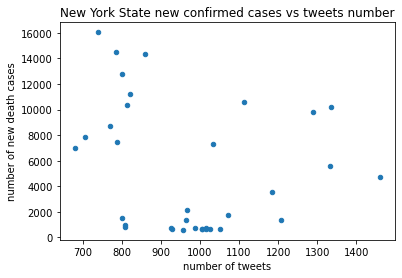

In [7]:
#the analysis toward New York
ny_twitter_df = covid_tweets_states_df[covid_tweets_states_df['States'] =='NY']
ny_twitter_df=ny_twitter_df[ny_twitter_df['Week_index']>15]

ny_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'New York State new confirmed cases vs tweets number')


<AxesSubplot:title={'center':'New York State new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

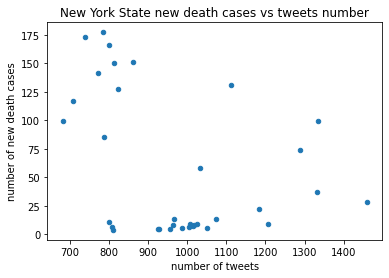

In [8]:
ny_twitter_df.plot.scatter( x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'New York State new death cases vs tweets number')

<AxesSubplot:title={'center':'California new confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

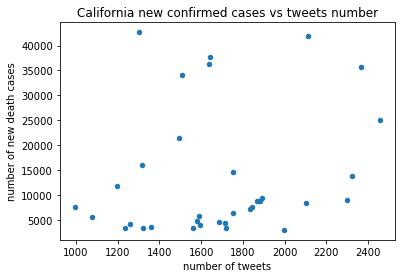

In [9]:
#the analysis toward California
california_twitter_df = covid_tweets_states_df[covid_tweets_states_df['States'] =='CA']
california_twitter_df=california_twitter_df[california_twitter_df['Week_index']>15]

california_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'California new confirmed cases vs tweets number')


<AxesSubplot:title={'center':'California new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

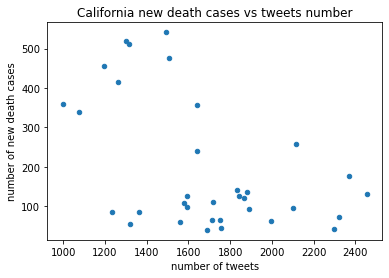

In [10]:
california_twitter_df.plot.scatter( x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'California new death cases vs tweets number')

<AxesSubplot:title={'center':'Texas new Confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

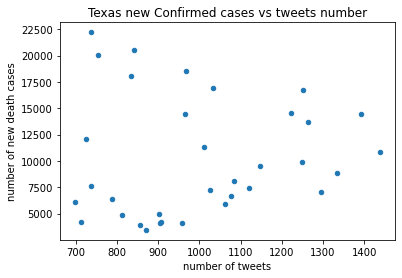

In [11]:
#the analysis toward Texas
tx_twitter_df = covid_tweets_states_df[covid_tweets_states_df['States'] =='TX']
tx_twitter_df=tx_twitter_df[tx_twitter_df['Week_index']>15]

tx_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'Texas new Confirmed cases vs tweets number')


<AxesSubplot:title={'center':'Texas new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

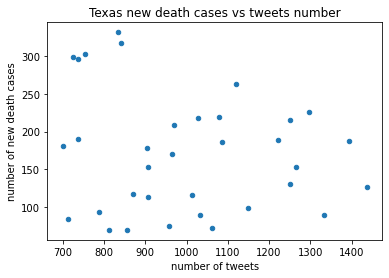

In [12]:
tx_twitter_df.plot.scatter( x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'Texas new death cases vs tweets number')